In [1]:
import sys
class Simplex: #classでの実装
    
    def __init__(self,a): #初期化
        self.a = a #係数行列
        self.row = len(a) #行数
        self.col = len(a[0]) + len(a) - 1 #列数
        self.var = len(a[0]) - 1 #変数の数
        
    def exe(self): #実行
        self.build_mat() #係数行列を作成
        while True:
            mn, y = self.select_col() #列を選択
            if mn >= 0:
                break
            x = self.select_row(y) #行を選択
            self.row_reduction(x, y) #掃き出し法の実行
        
            for i in range(self.var): #結果をプリント
                flag = -1
                for j in range(self.row):
                    if self.a[j][i] == 1:
                        flag = j
                if flag == -1:
                    v = 0.0
                else:
                    v = self.a[flag][self.col-1]
                print("x{} = {}".format(i+1, v))
            f = self.a[self.row-1][self.col-1]
            print("f  = {}".format(f))
        
    def build_mat(self): #係数行列を作成
        for i in range(len(self.a)-1):
            temp = self.a[i].pop()
            for j in range(len(self.a)-1):
                if j == i:
                    self.a[i].append(1)
                else:
                    self.a[i].append(0)
            self.a[i].append(temp)

        for i in range(len(self.a[len(a)-1])):
            self.a[len(self.a)-1][i] *= -1

        while len(self.a[len(self.a)-1]) < len(self.a[0]):
            self.a[len(self.a)-1].append(0)
        
    def select_col(self): #列を選択
        min_a = 10*9
        y = 0
        for i in range(self.col-1):
            if self.a[self.row-1][i] < min_a:
                min_a, y = self.a[self.row-1][i], i
        return [min_a, y]

    def select_row(self,y): #行を選択
        min_a = 10*9
        x = 0
        for i in range(self.row-1):
            if self.a[i][y] != 0:
                p = self.a[i][self.col-1] / self.a[i][y]
                if self.a[i][y] > 0 and p < min_a:
                    min_a, x = p, i
        if min_a == 10*9:
            print("unbounded")
            sys.exit(1)
        return x

    def row_reduction(self, x, y): #掃き出し法の実行
        p = self.a[x][y]
        for i in range(self.col):
            self.a[x][i] /= p
        for i in range(self.row):
            if i != x:
                d = self.a[i][y]
                for j in range(self.col):
                    self.a[i][j] -= d * self.a[x][j]


In [2]:
a=[[ 1.0,  2.0, 14.0],
   [ 1.0,  1.0, 8.0],
   [ 3.0,  1.0, 18.0],
   [ 2.0,  3.0]]

obj = Simplex(a)
obj.exe()

14.0
8.0
18.0
x1 = 0.0
x2 = 7.0
f  = 21.0
x1 = 2.0
x2 = 6.0
f  = 22.0


In [3]:
a=[[1,2,10],
   [2,1,8],
   [600,900]]

obj = Simplex(a)
obj.exe()

10
8
x1 = 0.0
x2 = 5.0
f  = 4500.0
x1 = 2.0
x2 = 4.0
f  = 4800.0


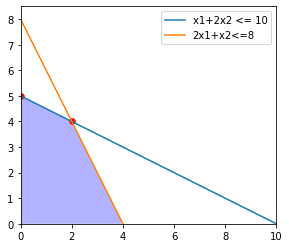

In [4]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 10, 100)

y1 = 5 - 0.5*t
y2 =  8 - 2*t
y3 = np.zeros_like(t)
#y3 = np.full(100, 100)
y4 = np.minimum(y1, y2)
#y4 = np.maximum(y1, y2)
y5=16/3-2/3*t

plt.figure()
#plt.axis('equal')

plt.gca().set_aspect('equal', adjustable='box')
plt.plot(t, y1, label="x1+2x2 <= 10")
plt.plot(t, y2, label="2x1+x2<=8")
#plt.plot(t, y5, label="f")
plt.fill_between(t, y3, y4, where=y4>y3, facecolor='blue', alpha=0.3)
plt.xlim(0, 10)
plt.ylim(0, 8.5)
plt.scatter(0,5,c='red',s=30)
plt.scatter(2,4,c='red',s=30)
plt.legend(loc=0)

plt.show()